In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_DV_03032020.csv')
df.head()

,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army Air Forces,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",Unknown,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [3]:
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  4975 non-null   datetime64[ns]
 1   TIME                  3459 non-null   object        
 2   LOCATION              4972 non-null   object        
 3   OPERATOR              4975 non-null   object        
 4   FLIGHT#               1318 non-null   object        
 5   ROUTE                 4197 non-null   object        
 6   AIRCRAFT_TYPE         4960 non-null   object        
 7   AIRCRAFT_REG          4701 non-null   object        
 8   CN_LN                 4302 non-null   object        
 9   TOTAL_ONBOARD         4957 non-null   float64       
 10  PASSENGER_ONBOARD     4746 non-null   float64       
 11  CREW_ONBOARD          4749 non-null   float64       
 12  TOTAL_FATALITIES      4967 non-null   float64       
 13  PASSENGER_FATALITI

In [4]:
df.describe()

,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
count,4957.000000,4746.000000,4749.000000,4967.000000,4732.000000,4733.000000,4934.000000
mean,31.148880,26.960598,4.480943,22.386350,19.067836,3.581238,1.728820
std,45.513508,44.090380,3.488020,35.143385,34.238083,3.170287,55.663983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [5]:
df.isnull().sum() # missing data

DATE                       0
TIME                    1516
LOCATION                   3
OPERATOR                   0
FLIGHT#                 3657
ROUTE                    778
AIRCRAFT_TYPE             15
AIRCRAFT_REG             274
CN_LN                    673
TOTAL_ONBOARD             18
PASSENGER_ONBOARD        229
CREW_ONBOARD             226
TOTAL_FATALITIES           8
PASSENGER_FATALITIES     243
CREW_FATALITIES          242
GROUND_CASUALTIES         41
SUMMARY_OF_EVENTS         64
dtype: int64

Douglas DC-3                                333
De Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Antonov AN-26                                43
Douglas DC-4                                 38
Yakovlev YAK-40                              35
Junkers JU-52/3m                             31
De Havilland DH-4                            28
Douglas C-47B                                27
Douglas DC-6B                                27
Lockheed 18 Lodestar                         24
Breguet 14                                   22
Douglas DC-6                                 20
Antonov AN-24                                19
Curtiss C-46                                 19
Curtiss C-46A                                19
Douglas C-47-DL                              18
Antonov AN-12                                18
McDonnell Douglas DC-9-32                    18
Fokker F-27 Friendship 600              

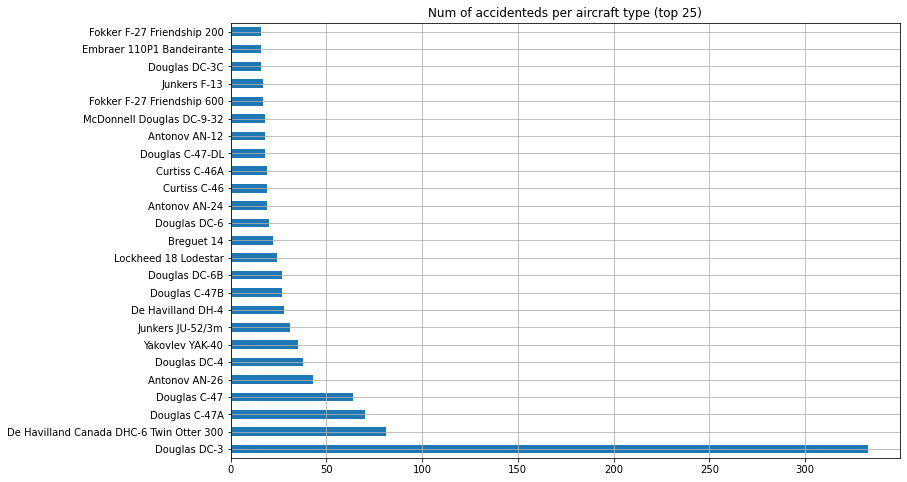

In [6]:
# Num of accident per aircraft type (top 25)

acc_per_ac_type = df['AIRCRAFT_TYPE'].value_counts().head(25)
acc_per_ac_type.plot(kind='barh', figsize=(12,8), title='Num of accidenteds per aircraft type (top 25)', grid=True)
acc_per_ac_type.head(25)

Aeroflot                               257
Military - U.S. Air Force              151
Military - U.S. Army Air Forces         73
Air France                              72
Deutsche Lufthansa                      71
Military - UK Royal Air Force           54
United Air Lines                        44
China National Aviation Corporation     43
Pan American World Airways              42
American Airlines                       37
US Aerial Mail Service                  35
KLM Royal Dutch Airlines                35
Indian Airlines                         34
Philippine Air Lines                    33
Private                                 31
British Overseas Airways                29
Military - U.S. Navy                    29
Avianca                                 27
Eastern Air Lines                       25
Northwest Orient Airlines               25
Sabena                                  24
Aeropostale                             24
Imperial Airways                        23
Military - 

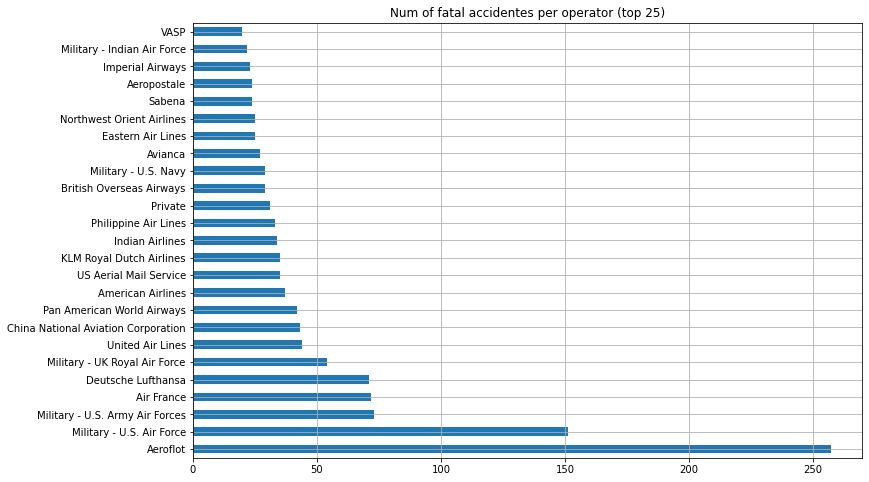

In [7]:
# Num of accidents per airline / operator (top 25)

acc_per_operator = df['OPERATOR'].value_counts().head(25)
acc_per_operator.plot(kind='barh', figsize=(12,8), title='Num of fatal accidentes per operator (top 25)', grid=True)
acc_per_operator.head(25)

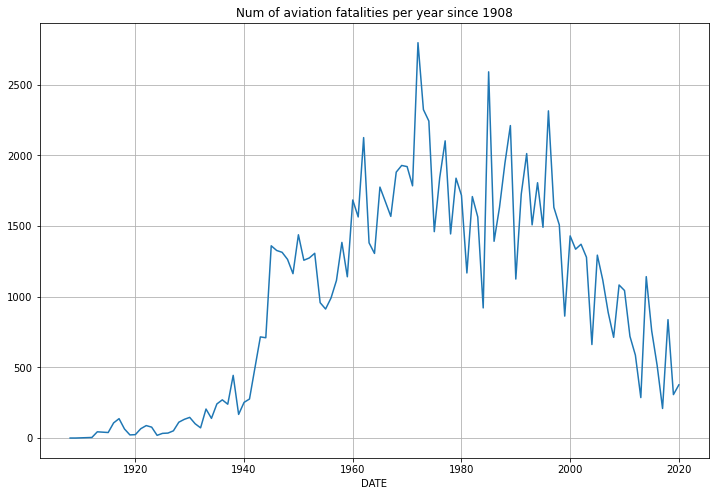

In [8]:
# Num of aviation fatalities per year since 1908
df['TOTAL_FATALITIES'].groupby(df.DATE.dt.year).agg('sum').plot(figsize=(12,8), title='Num of aviation fatalities per year since 1908', grid=True)

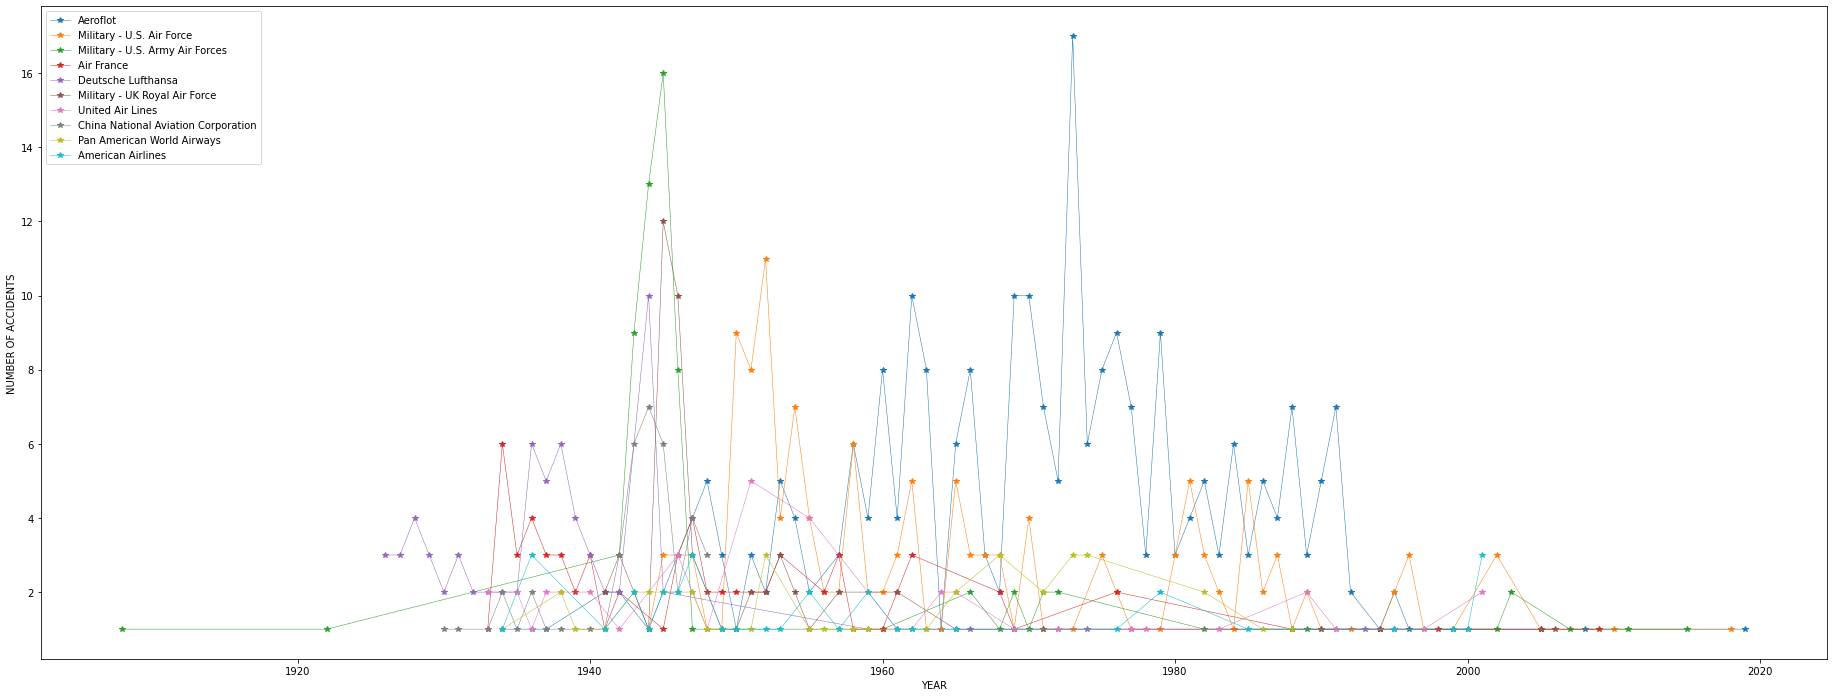

In [29]:
# Accidents per year of the top 10 accidented operators

top10_acc_operator = acc_per_operator.head(10)

plt.figure(figsize=(32,12))
plt.xlabel ('YEAR')
plt.ylabel('NUMBER OF ACCIDENTS')

df_accidents = df[['DATE', 'OPERATOR']]

for op in top10_acc_operator.index:
  
  df_accidents_py = df_accidents[df_accidents.OPERATOR == op].groupby(df.DATE.dt.year).agg('count')
  plt.plot(df_accidents_py.index, df_accidents_py.DATE, linewidth=0.5, marker='*')

plt.legend(top10_acc_operator.index, loc='upper left')
plt.savefig('crashes.png', dpi=300)
plt.show()


In [10]:
df_summary = df['SUMMARY_OF_EVENTS']
df_summary

0       During a demonstration flight, a U.S. Army fly...
1       Eugene Lefebvre was the first pilot to ever be...
2       First U.S. dirigible Akron exploded just offsh...
3       The first fatal airplane accident in Canada oc...
4       The airship flew into a thunderstorm and encou...
                              ...                        
4970    The passenger plane crashed about a minute aft...
4971    While taking off, the tail of the plane struck...
4972    The aircraft crashed shortly after taking off ...
4973    The plane took off from Tehran International A...
4974    While landing duriing high winds and heavey ra...
Name: SUMMARY_OF_EVENTS, Length: 4975, dtype: object

In [11]:
import spacy
import string
#from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print("Num. of stop words: %d" %len(stop_words))

Num. of stop words: 326


In [12]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# Create a tokenizer function for pre-processing each accident summary

def spacy_tokenizer(sentence):
    # Create token object
    mytokens = nlp(sentence)
    #mytokens = parser(sentence)

    # Lemmatize each token and convert it into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuations
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuation ]

    # return preprocessed list of tokens
    return mytokens

In [14]:
test_sentence = "While attempting to land in rain and fog, the aircraft ran out of fuel, stalled and crashed at Lunghwa field."
tokens = spacy_tokenizer(test_sentence)
tokens

['attempt',
 'land',
 'rain',
 'fog',
 'aircraft',
 'run',
 'fuel',
 'stall',
 'crash',
 'lunghwa',
 'field']

In [15]:
# Create a new column in the dataframe and assign the tokens for each accident

tokens = []

for x in df.SUMMARY_OF_EVENTS:
  tokens.append(spacy_tokenizer(str(x)))
  
df['TOKENS'] = tokens

In [16]:
df['TOKENS'].head(20)

0     [demonstration, flight, u.s., army, flyer, fly...
1     [eugene, lefebvre, pilot, kill, air, accident,...
2     [u.s., dirigible, akron, explode, offshore, al...
3     [fatal, airplane, accident, canada, occur, ame...
4     [airship, fly, thunderstorm, encounter, severe...
5     [hydrogen, gas, vent, suck, forward, engine, i...
6     [crash, tree, attempt, land, shoot, british, f...
7     [explode, burn, near, neuwerk, island, hydroge...
8             [crash, near, black, sea, cause, unknown]
9              [shoot, british, aircraft, crash, flame]
10    [shoot, flame, british, 39th, home, defence, s...
11                                       [crash, storm]
12    [shoot, british, anti, aircraft, fire, aircraf...
13                                 [catch, fire, crash]
14              [strike, lightning, crash, baltic, sea]
15    [crash, sea, altitude, 3,000, ft, hit, british...
16                           [shoot, british, aircraft]
17                                    [shoot, ai

In [17]:
# Create a dictionary with pairs of words and their frequencies
# to count how relevant each of these words are

hash_map = {}

for tokens in df['TOKENS']:
  for word in tokens:
    if word in hash_map:
      hash_map[word] = hash_map[word] + 1
    else:
      hash_map[word] = 1


# Search for the frequency of specific relevant words
words_list = ['rain', 'fog', 'wind', 'snow', 'turbulence', 'storm', 'clear', 
              'midair', 'sea', 'ocean', 'mountain', 'hill', 'building', 
              'residential', 'hijack', 'missile', 'failure', 'malfunction', 
              'explosion', 'collision', 'overload', 'takeoff', 'climb',
              'cruise', 'descend', 'landing']

for w in words_list:
  print(w + " : " + str(hash_map[w]))

rain : 206
fog : 334
wind : 146
snow : 107
turbulence : 133
storm : 74
clear : 96
midair : 95
sea : 262
ocean : 132
mountain : 614
hill : 152
building : 74
residential : 27
hijack : 24
missile : 47
failure : 851
malfunction : 65
explosion : 65
collision : 140
overload : 32
takeoff : 533
climb : 200
cruise : 49
descend : 280
landing : 680


In [18]:
# Create a mini-dataframe with weather conditions stats
weather_words = {'rain', 'fog', 'wind', 'snow', 'turbulence', 'storm', 'clear'}
weather_df = []

for w in weather_words:
  print(w + " : " + str(hash_map[w]))
  weather_df.append([w, hash_map[w]])

weather_df = pd.DataFrame(weather_df, columns=['WEATHER_CONDITION', 'NBR_ACCIDENTS'])
weather_df

snow : 107
rain : 206
clear : 96
wind : 146
turbulence : 133
storm : 74
fog : 334


,WEATHER_CONDITION,NBR_ACCIDENTS
0,snow,107
1,rain,206
2,clear,96
3,wind,146
4,turbulence,133
5,storm,74
6,fog,334


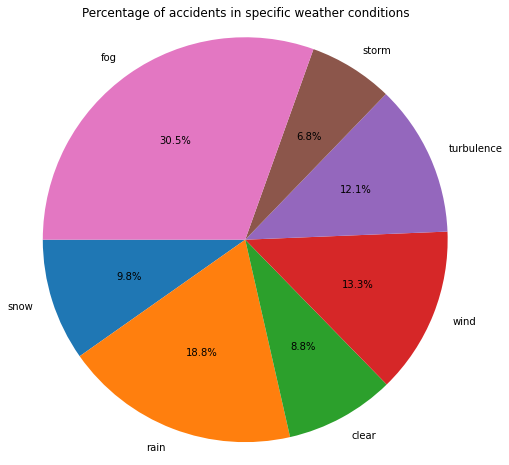

In [19]:
# Plot a pie chart with % values
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

fig1, ax1 = plt.subplots()
ax1.pie(weather_df.NBR_ACCIDENTS, labels=weather_df.WEATHER_CONDITION, autopct='%1.1f%%', startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents in specific weather conditions')
plt.show()

In [20]:
# Create a mini-dataframe with phase of the flight stats
flight_phase_words = {'takeoff', 'climb', 'cruise', 'descend', 'landing'}
flight_phase_df = []

for f in flight_phase_words:
  print(f + " : " + str(hash_map[f]))
  flight_phase_df.append([f, hash_map[f]])
  
flight_phase_df = pd.DataFrame(flight_phase_df, columns=['FLIGHT_PHASE', 'NBR_ACCIDENTS'])
flight_phase_df

descend : 280
climb : 200
takeoff : 533
landing : 680
cruise : 49


,FLIGHT_PHASE,NBR_ACCIDENTS
0,descend,280
1,climb,200
2,takeoff,533
3,landing,680
4,cruise,49


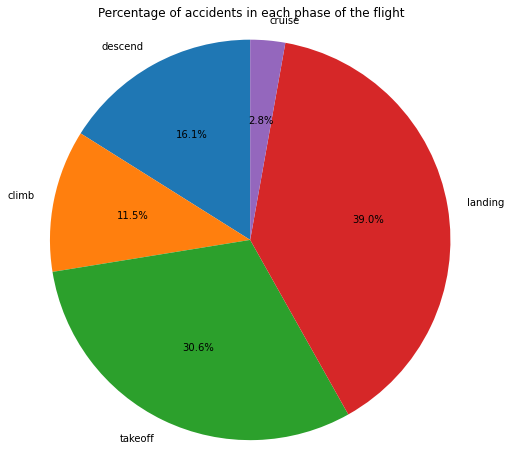

In [21]:
# Plot a pie chart with % values

fig2, ax2 = plt.subplots()
ax2.pie(flight_phase_df.NBR_ACCIDENTS, labels=flight_phase_df.FLIGHT_PHASE, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents in each phase of the flight')
plt.show()

In [25]:
# Create a mini-dataframe with crash zone stats
# Some words are counted together: 
#   sea & ocean --> sea
#   montain & hill --> mountain
#   building & residential --> residential

crash_zone_words = {'midair', 'sea', 'mountain', 'residential'}
crash_zone_df = []

for z in crash_zone_words:
  print(z + " : " + str(hash_map[z]))
  if (z == 'sea'):
    crash_zone_df.append([z, hash_map[z] + hash_map['ocean']])
  elif (z == 'mountain'):
    crash_zone_df.append([z, hash_map[z] + hash_map['hill']])
  elif (z == 'residential'):
    crash_zone_df.append([z, hash_map[z] + hash_map['building']])
  else:
    crash_zone_df.append([z, hash_map[z]])

  
crash_zone_df = pd.DataFrame(crash_zone_df, columns=['CRASH_ZONE', 'NBR_ACCIDENTS'])
crash_zone_df

sea : 262
residential : 27
midair : 95
mountain : 614


,CRASH_ZONE,NBR_ACCIDENTS
0,sea,394
1,residential,101
2,midair,95
3,mountain,766


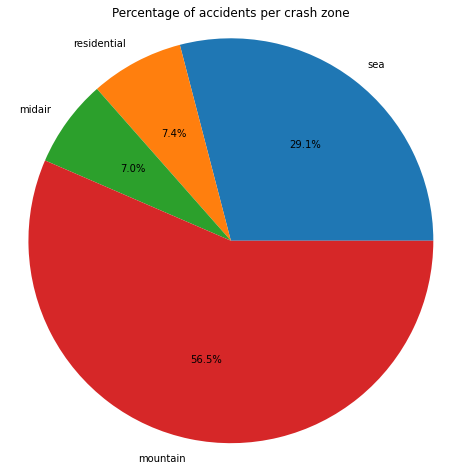

In [26]:
# Plot a pie chart with % values

fig3, ax3 = plt.subplots()
ax3.pie(crash_zone_df.NBR_ACCIDENTS, labels=crash_zone_df.CRASH_ZONE, autopct='%1.1f%%', startangle=0)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents per crash zone')
plt.show()

In [23]:
# Create a mini-dataframe with crash reason stats
crash_reason_words = {'hijack', 'missile', 'failure', 'malfunction', 'explosion', 'overload'}
crash_reason_df = []

for r in crash_reason_words:
  print(r + " : " + str(hash_map[r]))
  crash_reason_df.append([r, hash_map[r]])
  
crash_reason_df = pd.DataFrame(crash_reason_df, columns=['CRASH_REASON', 'NBR_ACCIDENTS'])
crash_reason_df

missile : 47
failure : 851
hijack : 24
explosion : 65
overload : 32
malfunction : 65


,CRASH_REASON,NBR_ACCIDENTS
0,missile,47
1,failure,851
2,hijack,24
3,explosion,65
4,overload,32
5,malfunction,65


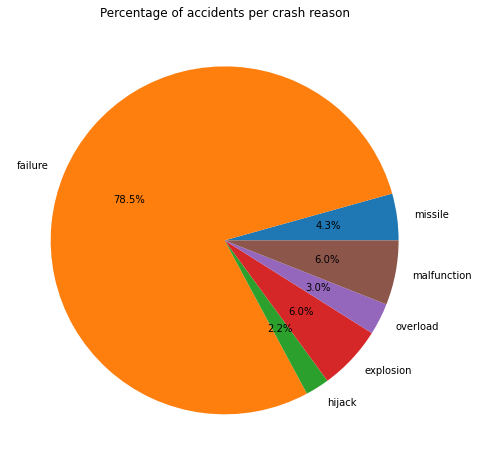

In [27]:
# Pie chart with % values

fig4, ax4 = plt.subplots()
ax4.pie(crash_reason_df.NBR_ACCIDENTS, labels=crash_reason_df.CRASH_REASON, autopct='%1.1f%%')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of accidents per crash reason')
plt.show()